<a href="https://colab.research.google.com/github/IsisMaranhao/TCC_USPESALQ/blob/main/ARROZ_LICENSE_ARQ_CRIADA_750.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Endereço - Kaglle dataset
# https://www.kaggle.com/datasets/alikhalilit98/rice-image-dataset-for-object-detection

In [ ]:
!pip install kaggle --upgrade
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.8 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from platform import python_version
print("Versão Python:", python_version())

Versão Python: 3.9.16


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isismaranho","key":"2ed35c5c137ac60117f051206dbeccf2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!echo > ~/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d alikhalilit98/rice-image-dataset-for-object-detection

100% 462M/462M [00:10<00:00, 44.2MB/s]
100% 462M/462M [00:10<00:00, 44.4MB/s]


In [ ]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/rice-image-dataset-for-object-detection.zip", 'r')
zip_ref.extractall("/content/sample_data")
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd

import datetime
import timeit

import itertools
import glob
import cv2

import os
import os.path
from pathlib import Path

import seaborn as sns
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from matplotlib import gridspec 
from google.colab.patches import cv2_imshow

import shutil

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model

from keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Lambda
 
from keras.optimizers import Adam, SGD, RMSprop

from keras.applications import VGG16, ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical, plot_model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

VERIFICANDO SE AS IMAGENS ESTÃO NA PASTA CORRETAMENTE

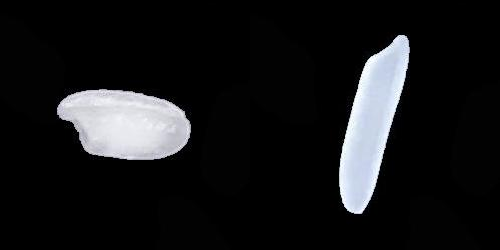

In [ ]:
img1=cv2.imread('/content/sample_data/Rice_Image_Dataset_OD/Arborio/Arborio (1).jpg')
img2=cv2.imread('/content/sample_data/Rice_Image_Dataset_OD/Basmati/Basmati (1).jpg')

final_image = cv2.hconcat((img1, img2))
 
cv2_imshow(final_image)

In [ ]:
# Verificando o tipo de dados da matriz da imagem
print('Dtype da imagem1 é {} e o Dtype da imagem2 é {} \n'
     .format(img1.dtype,img2.dtype))

# Verificando a altura da imagem
print('A altura da imagem1 é {} e a altura da imagem2 é {}'
     .format(img1.shape[0],img2.shape[0]))

# Verificando a largura da imagem
print('A largura da imagem1 é {} e a largura da imagem2 é {} \n'
     .format(img1.shape[1],img2.shape[1]))

# Verificando o número de canais da imagem
print('O número de canais da imagem1 é {} e o número de canais da imagem2 é {}'
     .format(img1.shape[2],img2.shape[2]))

Dtype da imagem1 é uint8 e o Dtype da imagem2 é uint8 

A altura da imagem1 é 250 e a altura da imagem2 é 250
A largura da imagem1 é 250 e a largura da imagem2 é 250 

O número de canais da imagem1 é 3 e o número de canais da imagem2 é 3


CRIANDO UMA PASTA COM NÚMEROS MENORES DE IMAGENS PARA APLICAR O MODELO

In [ ]:
diretorio = "/content/sample_data/"
nome_da_pasta = "Rice_Dataset_menor"

caminho_completo = os.path.join(diretorio, nome_da_pasta)
os.makedirs(caminho_completo, exist_ok=True)

In [ ]:
nomes_das_pastas=["Arborio","Basmati","Ipsala","Jasmine","Karacadag"]

for nome in nomes_das_pastas:
  diretorio = "/content/sample_data/Rice_Dataset_menor"
  caminho_completo = os.path.join(diretorio, nome)
  os.makedirs(caminho_completo, exist_ok=True)

In [ ]:
im_shape = (250,250)
seed = 10
BATCH_SIZE = 125 

nomes_das_pastas=["Arborio","Basmati","Ipsala","Jasmine","Karacadag"]

caminho_antigo="/content/sample_data/Rice_Image_Dataset_OD/"
caminho_novo="/content/sample_data/Rice_Dataset_menor/"

data = []

for pasta in nomes_das_pastas:
  src_folder = caminho_antigo + pasta
  dst_folder = caminho_novo + pasta

  # Obtenha a lista de todas as imagens .jpg na pasta de origem
  src_files = glob.glob(f"{src_folder}/*.jpg")[:750]

  # Move cada imagem para a pasta de destino
  for src_file in src_files:
    shutil.move(src_file, dst_folder)

    data_folder = os.listdir(dst_folder)
    data.extend(data_folder)

In [ ]:
arborio_images = []
basmati_images = []
ipsala_images = []
jasmine_images = []
karacadag_images = []

for img_path in glob.glob('/content/sample_data/Rice_Dataset_menor/Arborio/*.jpg'):
  arborio_images.append(mpimg.imread(img_path))

for img_path in glob.glob('/content/sample_data/Rice_Dataset_menor/Basmati/*.jpg'):
  basmati_images.append(mpimg.imread(img_path))

for img_path in glob.glob('/content/sample_data/Rice_Dataset_menor/Ipsala/*.jpg'):
  ipsala_images.append(mpimg.imread(img_path))

for img_path in glob.glob('/content/sample_data/Rice_Dataset_menor/Jasmine/*.jpg'):
  jasmine_images.append(mpimg.imread(img_path))
    
for img_path in glob.glob('/content/sample_data/Rice_Dataset_menor/Karacadag/*.jpg'):
  karacadag_images.append(mpimg.imread(img_path))

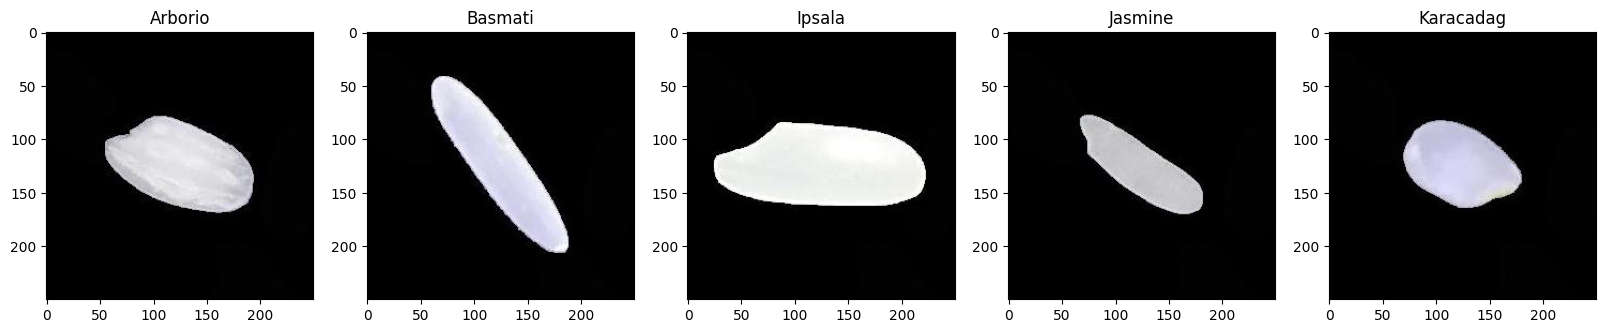

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20,20))

axs[0].imshow(arborio_images[1], cmap='gray')
axs[0].set_title('Arborio')

axs[1].imshow(basmati_images[1], cmap='gray')
axs[1].set_title('Basmati')

axs[2].imshow(ipsala_images[1], cmap='gray')
axs[2].set_title('Ipsala')

axs[3].imshow(jasmine_images[1], cmap='gray')
axs[3].set_title('Jasmine')

axs[4].imshow(karacadag_images[1], cmap='gray')
axs[4].set_title('Karacadag')

plt.show()

In [ ]:
print(len(arborio_images))
print(len(basmati_images))
print(len(ipsala_images))
print(len(jasmine_images))
print(len(karacadag_images))

750
750
750
750
750


In [ ]:
diretorio = "/content/sample_data/"
nome_da_pasta = "Rice_Dataset_menor"

caminho_completo = os.path.join(diretorio, nome_da_pasta)
os.makedirs(caminho_completo, exist_ok=True)

In [ ]:
data=caminho_completo

diretorio_completo = Path(caminho_completo)
caminhos_arquivos_png = list(diretorio_completo.glob("**/*.jpg"))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], caminhos_arquivos_png))

In [ ]:
print(len(labels))

3750


In [ ]:
# Caminhos & labels...
filepaths = pd.Series(caminhos_arquivos_png, name = 'File').astype(str)
labels = pd.Series(labels, name = 'Label')

# Concatenando...
df = pd.concat([filepaths, labels], axis=1)

# Mudando os nomes...
df['Label'].replace({"non_fire_images":"nofire","fire_images":"fire"}, inplace=True)

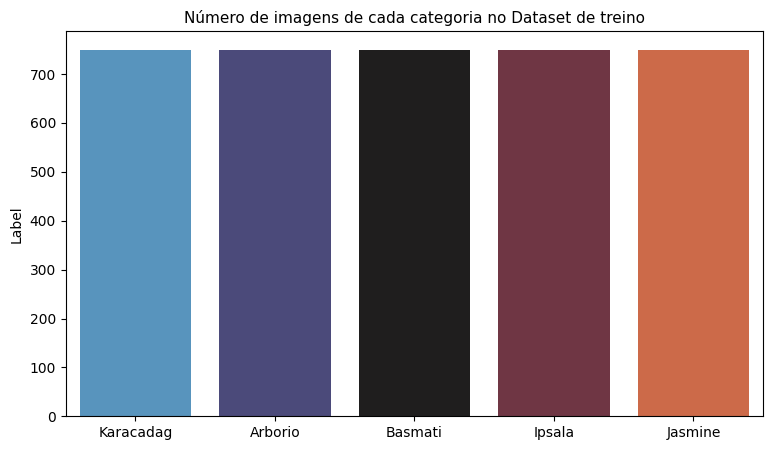

In [ ]:
# Visualizando os dados do dataset em um barplot
vc = df['Label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc, palette = "icefire")
plt.title("Número de imagens de cada categoria no Dataset de treino", fontsize = 11)
plt.savefig("/content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/1_ARQ_CRIADA_750/grafico_quantidade_imagens_treino_Developed.jpg")
plt.show()

In [ ]:
print(vc.index[0])
print(vc.index[1])
print(vc.index[2])
print(vc.index[3])
print(vc.index[4])

Karacadag
Arborio
Basmati
Ipsala
Jasmine


CRIANDO BASE DE TREINO E VALIDAÇÃO

In [ ]:
# Misturando o dataframe e resetando o index
df = df.sample(frac = 1, random_state = 83).reset_index(drop = True)

# Resultado
df.head()

,File,Label
0,/content/sample_data/Rice_Dataset_menor/Karaca...,Karacadag
1,/content/sample_data/Rice_Dataset_menor/Karaca...,Karacadag
2,/content/sample_data/Rice_Dataset_menor/Arbori...,Arborio
3,/content/sample_data/Rice_Dataset_menor/Karaca...,Karacadag
4,/content/sample_data/Rice_Dataset_menor/Karaca...,Karacadag


In [ ]:
df_train, df_val = train_test_split(df, train_size = 0.7, random_state = 86)

df_train.head()
df_val.head()
print('Qtde de treino: {}'.format(len(df_train)))
print('Qtde de validaçao: {}'.format(len(df_val)))

Qtde de treino: 2625
Qtde de validaçao: 1125


In [ ]:
# Visualizando os dados em ambos datasets
print('Dataset de treinamento: \n')

print(f'Número de imagens: {df_train.shape[0]} \n')

print(f'Número de imagens Basmati: {df_train["Label"].value_counts()[0]}')
print(f'Número de imagens Jasmine: {df_train["Label"].value_counts()[1]}')
print(f'Número de imagens Karacadag: {df_train["Label"].value_counts()[2]}')
print(f'Número de imagens Arborio: {df_train["Label"].value_counts()[3]}')
print(f'Número de imagens Ipsala: {df_train["Label"].value_counts()[4]} \n')
      
print('Dataset de teste: \n')
      
print(f'Número de imagens no dataset de validacao: {df_val.shape[0]} \n')

print(f'Número de imagens Basmati: {df_val["Label"].value_counts()[0]}')
print(f'Número de imagens Jasmine: {df_val["Label"].value_counts()[1]}')
print(f'Número de imagens Karacadag: {df_val["Label"].value_counts()[2]}')
print(f'Número de imagens Arborio: {df_val["Label"].value_counts()[3]}')
print(f'Número de imagens Ipsala: {df_val["Label"].value_counts()[4]}')

Dataset de treinamento: 

Número de imagens: 2625 

Número de imagens Basmati: 534
Número de imagens Jasmine: 532
Número de imagens Karacadag: 527
Número de imagens Arborio: 520
Número de imagens Ipsala: 512 

Dataset de teste: 

Número de imagens no dataset de validacao: 1125 

Número de imagens Basmati: 238
Número de imagens Jasmine: 230
Número de imagens Karacadag: 223
Número de imagens Arborio: 218
Número de imagens Ipsala: 216


In [ ]:
#Separando x_train e y_train

y_train = df_train["Label"]
x_train = df_train.drop(labels = ["Label"],axis = 1)
print(x_train.head())

                                                   File
825   /content/sample_data/Rice_Dataset_menor/Basmat...
1742  /content/sample_data/Rice_Dataset_menor/Arbori...
2484  /content/sample_data/Rice_Dataset_menor/Arbori...
2389  /content/sample_data/Rice_Dataset_menor/Karaca...
3036  /content/sample_data/Rice_Dataset_menor/Basmat...


In [ ]:
x_train.shape

(2625, 1)

In [ ]:
# Separando x_val e y_val

y_val = df_val["Label"]
x_val = df_val.drop(labels = ["Label"],axis = 1)
print(x_val.head())

                                                   File
1182  /content/sample_data/Rice_Dataset_menor/Ipsala...
1308  /content/sample_data/Rice_Dataset_menor/Ipsala...
1390  /content/sample_data/Rice_Dataset_menor/Karaca...
2883  /content/sample_data/Rice_Dataset_menor/Jasmin...
1675  /content/sample_data/Rice_Dataset_menor/Jasmin...


In [ ]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(y_train)
Y_val = label_encoder.fit_transform(y_val)

In [ ]:
print(len(Y_train))
print(Y_train)

2625
[1 0 0 ... 2 4 1]


In [ ]:
print(len(Y_val))
print(Y_val)

1125
[2 2 4 ... 3 4 1]


True

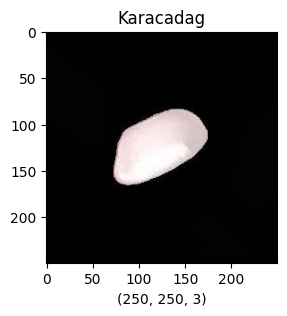

In [ ]:
# Observando as imagens do dataset de treino
figure = plt.figure(figsize=(3,3))
x = cv2.imread(df_train["File"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df_train["Label"][0])
cv2.imwrite("/content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/1_ARQ_CRIADA_750/grao.jpg", x)

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.3)

In [ ]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(data, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(data, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(data, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())

print('Classes: '+str(classes))
num_classes  = len(classes)

Found 3000 images belonging to 5 classes.
Found 1125 images belonging to 5 classes.
Found 3750 images belonging to 5 classes.
Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


ARQUITETURA CRIADA

In [ ]:
model1 = tf.keras.Sequential()

# Camada de Convolução com 32 filtros e uma janela de 3x3
model1.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(250, 250, 3), activation='relu'))

# Camada de Pooling Max para diminuir o tamanho das representações
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Camadas de Convolução e Pooling
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Camada de Achatamento para tornar as representações 1D
model1.add(tf.keras.layers.Flatten())

# Camada densa com 512 neurônios e ativação relu
model1.add(tf.keras.layers.Dense(512, activation='relu'))

# Camada de saída com 5 neurônios e ativação softmax
model1.add(tf.keras.layers.Dense(5, activation='softmax'))

# Compilar o modelo usando categorical_crossentropy como função de perda e optimizer Adam
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

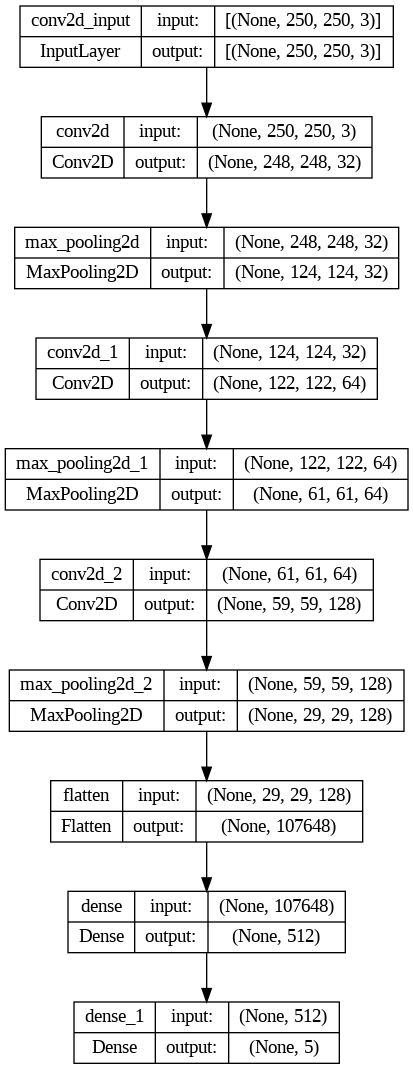

In [ ]:
plot_model(model1, to_file='model.png', show_layer_names = True , show_shapes = True)

In [ ]:
callback_1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

caminho_de_arquivo = "/content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/1_ARQ_CRIADA_750/"
callback_2 = keras.callbacks.ModelCheckpoint(caminho_de_arquivo, monitor='val_loss', verbose=1, patience=10, save_best_only=True, mode='min')

callback_3 = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, min_delta=0.1, patience=10, verbose=1)


In [ ]:
inicio = timeit.default_timer()

In [ ]:
epochs = 100

history1 = model1.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = epochs,
    callbacks=[callback_1, callback_2, callback_3]
)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 300.9788 - accuracy: 0.2440 
Epoch 1: val_loss improved from inf to 1.37262, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 651s 27s/step - loss: 300.9788 - accuracy: 0.2440 - val_loss: 1.3726 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.2940 - accuracy: 0.4400 
Epoch 2: val_loss improved from 1.37262 to 1.00637, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 651s 27s/step - loss: 1.2940 - accuracy: 0.4400 - val_loss: 1.0064 - val_accuracy: 0.5582 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 1.0416 - accuracy: 0.5457 
Epoch 3: val_loss improved from 1.00637 to 0.85075, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 631s 26s/step - loss: 1.0416 - accuracy: 0.5457 - val_loss: 0.8507 - val_accuracy: 0.6453 - lr: 0.0010
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.7227 
Epoch 4: val_loss improved from 0.85075 to 0.61817, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 626s 26s/step - loss: 0.6993 - accuracy: 0.7227 - val_loss: 0.6182 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.7870 
Epoch 5: val_loss improved from 0.61817 to 0.53236, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 650s 27s/step - loss: 0.5237 - accuracy: 0.7870 - val_loss: 0.5324 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 6/100
24/24 [==============================] - ETA: 0s - loss: 0.4599 - accuracy: 0.8167 
Epoch 6: val_loss improved from 0.53236 to 0.48804, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 650s 27s/step - loss: 0.4599 - accuracy: 0.8167 - val_loss: 0.4880 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 7/100
24/24 [==============================] - ETA: 0s - loss: 0.6376 - accuracy: 0.7523 
Epoch 7: val_loss improved from 0.48804 to 0.42016, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 643s 27s/step - loss: 0.6376 - accuracy: 0.7523 - val_loss: 0.4202 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 8/100
24/24 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.8007 
Epoch 8: val_loss improved from 0.42016 to 0.34962, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 648s 27s/step - loss: 0.5282 - accuracy: 0.8007 - val_loss: 0.3496 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 9/100
24/24 [==============================] - ETA: 0s - loss: 0.4670 - accuracy: 0.8247 
Epoch 9: val_loss did not improve from 0.34962
24/24 [==============================] - 651s 27s/step - loss: 0.4670 - accuracy: 0.8247 - val_loss: 0.3590 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 10/100
24/24 [==============================] - ETA: 0s - loss: 0.4471 - accuracy: 0.8247 
Epoch 10: val_loss improved from 0.34962 to 0.32317, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 649s 27s/step - loss: 0.4471 - accuracy: 0.8247 - val_loss: 0.3232 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 11/100
24/24 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8460 
Epoch 11: val_loss improved from 0.32317 to 0.26499, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 657s 27s/step - loss: 0.4023 - accuracy: 0.8460 - val_loss: 0.2650 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 12/100
24/24 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8447 
Epoch 12: val_loss did not improve from 0.26499
24/24 [==============================] - 646s 27s/step - loss: 0.4080 - accuracy: 0.8447 - val_loss: 0.3052 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 13/100
24/24 [==============================] - ETA: 0s - loss: 0.3581 - accuracy: 0.8587 
Epoch 13: val_loss did not improve from 0.26499
24/24 [==============================] - 644s 27s/step - loss: 0.3581 - accuracy: 0.8587 - val_loss: 0.2933 - val_accuracy: 0.8836 - lr: 0.0010
Epoch 14/100
24/24 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.8120 
Epoch 14: val_loss did not improve from 0.26499
24/24 [==============================] - 643s 27s/step - loss: 0.4710 - accuracy: 0.8120 - val_loss: 0.4483 - val_accuracy: 0.8276 - 

24/24 [==============================] - 655s 27s/step - loss: 0.3622 - accuracy: 0.8527 - val_loss: 0.1981 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 17/100
24/24 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.8720 
Epoch 17: val_loss did not improve from 0.19811
24/24 [==============================] - 649s 27s/step - loss: 0.3351 - accuracy: 0.8720 - val_loss: 0.2133 - val_accuracy: 0.9191 - lr: 0.0010
Epoch 18/100
24/24 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.8853 
Epoch 18: val_loss improved from 0.19811 to 0.19788, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 653s 27s/step - loss: 0.2954 - accuracy: 0.8853 - val_loss: 0.1979 - val_accuracy: 0.9307 - lr: 0.0010
Epoch 19/100
24/24 [==============================] - ETA: 0s - loss: 0.3130 - accuracy: 0.8830 
Epoch 19: val_loss did not improve from 0.19788
24/24 [==============================] - 656s 27s/step - loss: 0.3130 - accuracy: 0.8830 - val_loss: 0.2053 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 20/100
24/24 [==============================] - ETA: 0s - loss: 0.2977 - accuracy: 0.8860 
Epoch 20: val_loss improved from 0.19788 to 0.15293, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 660s 28s/step - loss: 0.2977 - accuracy: 0.8860 - val_loss: 0.1529 - val_accuracy: 0.9520 - lr: 0.0010
Epoch 21/100
24/24 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.8830 
Epoch 21: val_loss did not improve from 0.15293
24/24 [==============================] - 657s 27s/step - loss: 0.2889 - accuracy: 0.8830 - val_loss: 0.2273 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 22/100
24/24 [==============================] - ETA: 0s - loss: 0.2807 - accuracy: 0.8957 
Epoch 22: val_loss did not improve from 0.15293
24/24 [==============================] - 655s 27s/step - loss: 0.2807 - accuracy: 0.8957 - val_loss: 0.1531 - val_accuracy: 0.9413 - lr: 0.0010
Epoch 23/100
24/24 [==============================] - ETA: 0s - loss: 0.2585 - accuracy: 0.8983 
Epoch 23: val_loss improved from 0.15293 to 0.13393, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 665s 28s/step - loss: 0.2585 - accuracy: 0.8983 - val_loss: 0.1339 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 24/100
24/24 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9087 
Epoch 24: val_loss improved from 0.13393 to 0.10312, saving model to /content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/2_ARQ_CRIADA_750/


24/24 [==============================] - 654s 27s/step - loss: 0.2366 - accuracy: 0.9087 - val_loss: 0.1031 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 25/100
24/24 [==============================] - ETA: 0s - loss: 0.2759 - accuracy: 0.8953 
Epoch 25: val_loss did not improve from 0.10312
24/24 [==============================] - 658s 27s/step - loss: 0.2759 - accuracy: 0.8953 - val_loss: 0.2119 - val_accuracy: 0.9316 - lr: 0.0010
Epoch 26/100
24/24 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.8970 
Epoch 26: val_loss did not improve from 0.10312

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
24/24 [==============================] - 657s 27s/step - loss: 0.2692 - accuracy: 0.8970 - val_loss: 0.1230 - val_accuracy: 0.9573 - lr: 0.0010
Epoch 27/100
24/24 [==============================] - ETA: 0s - loss: 0.2054 - accuracy: 0.9227 
Epoch 27: val_loss did not improve from 0.10312
24/24 [==============================] - 651s 27s/step

In [ ]:
fim = timeit.default_timer()

In [ ]:
duracao_segundos = fim - inicio
duracao_formatada = str(datetime.timedelta(seconds=duracao_segundos))
inicio_formatado = datetime.datetime.fromtimestamp(inicio).strftime('%Y-%m-%d %H:%M:%S.%f')
fim_formatado = datetime.datetime.fromtimestamp(fim).strftime('%Y-%m-%d %H:%M:%S.%f')

print('Duração:', duracao_formatada)

Duração: 6:18:20.820983


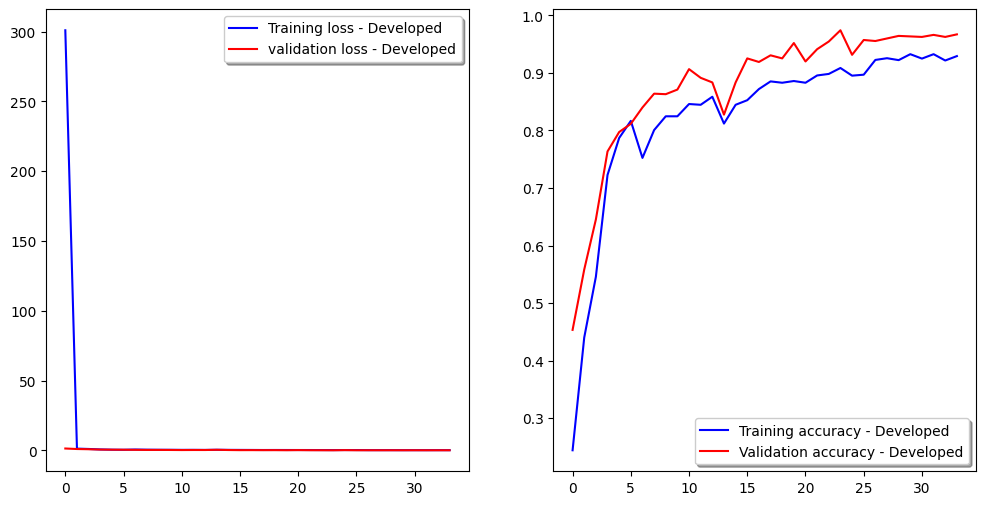

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(history1.history['loss'], color='b', label="Training loss - Developed")
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss - Developed",axes =ax[0])

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy - Developed")
ax[1].plot(history1.history['val_accuracy'], color='r',label="Validation accuracy - Developed")

legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
score1 = model1.evaluate(validation_generator)
print("Test Accuracy:", score1[1])
print("Test Loss:", score1[0])

9/9 [==============================] - 57s 6s/step - loss: 0.1161 - accuracy: 0.9671
Test Accuracy: 0.9671111106872559
Test Loss: 0.11610133200883865


In [ ]:
score_train1 = model1.evaluate(train_generator)
print("Train Accuracy:", score_train1[1])
print("Train Loss:", score_train1[0])

24/24 [==============================] - 205s 8s/step - loss: 0.1853 - accuracy: 0.9253
Train Accuracy: 0.9253333210945129
Train Loss: 0.18529632687568665


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/content/gdrive/MyDrive/TCC_Isis_Maranhao/CODIGO/1_ARQ_CRIADA_750/Confution_Matrix_Developed.jpg")

30/30 [==============================] - 193s 6s/step
Classification Report - Developed
              precision    recall  f1-score   support

     Arborio       0.94      0.98      0.96       750
     Basmati       0.97      0.96      0.97       750
      Ipsala       0.98      1.00      0.99       750
     Jasmine       0.95      0.95      0.95       750
   Karacadag       0.99      0.94      0.96       750

    accuracy                           0.97      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750



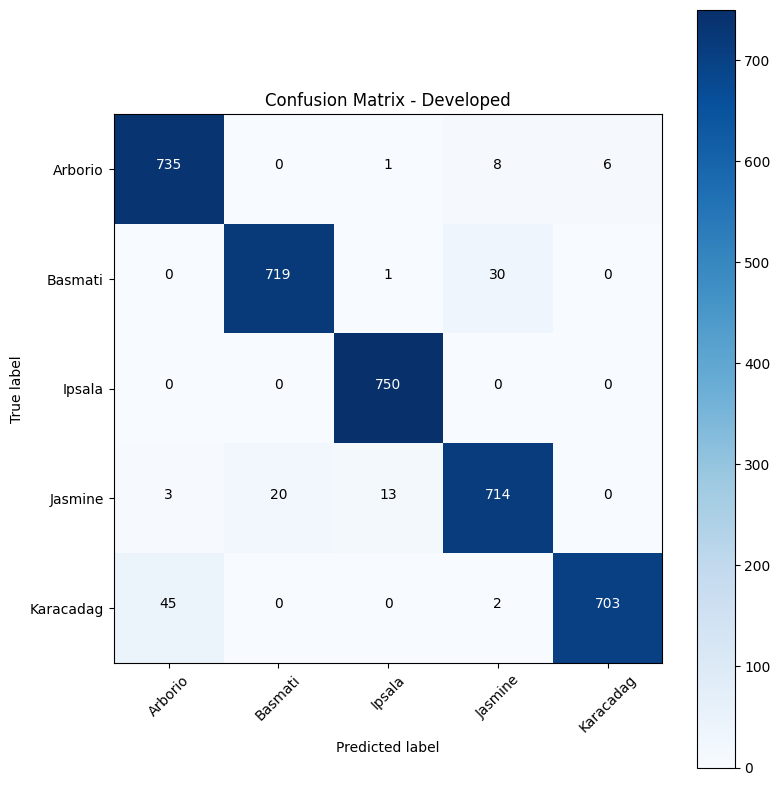

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model1.predict(test_generator, steps=nb_test_samples // BATCH_SIZE, workers=1)

y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix - Developed')

print('Classification Report - Developed')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))